In [6]:
%matplotlib inline

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
from mpl_toolkits.basemap import Basemap

In [9]:
import json

In [10]:
BUSINESSES = "data/yelp_academic_dataset_business.json"

In [11]:
COLS_TO_READ = ['state', 'longitude', 'latitude', 'name', 'stars']

In [13]:
ff = open(BUSINESSES)
results = []
dfs = []
categories = set()
for line in ff.xreadlines():
    result = json.loads(line)
    if (result['state'] == 'QC'):# and ('Restaurants' in result['categories']):
        dfs.append(pd.DataFrame(result, columns=COLS_TO_READ, index=pd.Index([result['business_id']])))
df = pd.concat(dfs)
del dfs

# Set index name to "business_id"
df.index.name = 'business_id'

Plot businesses

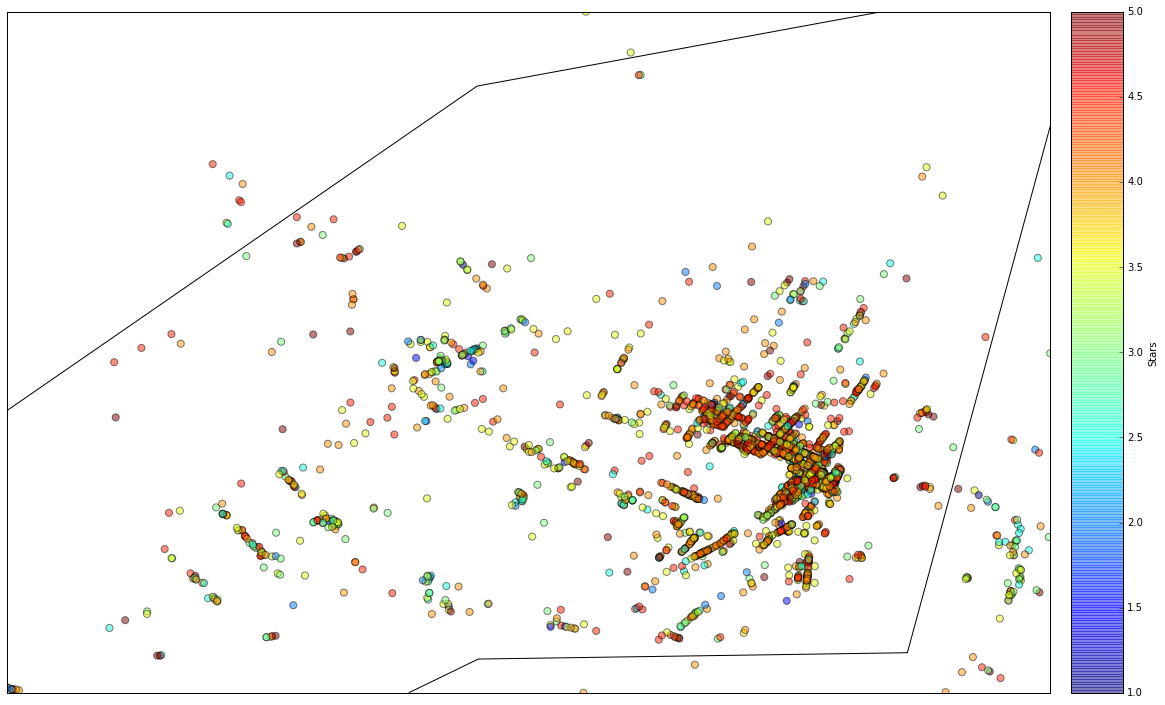

In [24]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes()
mtlmap = Basemap(ax=ax, projection='cyl', lon_0=-73.5673, lat_0=45.5017,
                 llcrnrlon=-73.953833, llcrnrlat=45.401767, urcrnrlon=-73.450201, urcrnrlat=45.730644,
                height=60000, width=60000, resolution='l')
mtlmap.drawcoastlines()
#mtlmap.drawstates()
#mtlmap.drawcountries()
ind = df['stars']>-1
scatt = mtlmap.scatter(df['longitude'][ind], df['latitude'][ind], c=df['stars'][ind], s=50, alpha=0.5)
#print xx
cbar = mtlmap.colorbar(scatt)
cbar.set_label("Stars")

In [10]:
print len(df)
df.describe()

3033


,longitude,latitude,stars
count,3033.000000,3033.000000,3033.000000
mean,-73.607528,45.511042,3.646719
std,0.076890,0.033933,0.740086
min,-73.953833,45.401767,1.000000
25%,-73.617952,45.495392,3.000000
50%,-73.579914,45.509835,3.500000
75%,-73.567417,45.525516,4.000000
max,-73.450201,45.730644,5.000000


Define column names for check-in data

In [5]:
cols = []
for hour in range(24):
    for day in range(7):
        cols.append("%d-%d" % (hour, day))
print cols

['0-0', '0-1', '0-2', '0-3', '0-4', '0-5', '0-6', '1-0', '1-1', '1-2', '1-3', '1-4', '1-5', '1-6', '2-0', '2-1', '2-2', '2-3', '2-4', '2-5', '2-6', '3-0', '3-1', '3-2', '3-3', '3-4', '3-5', '3-6', '4-0', '4-1', '4-2', '4-3', '4-4', '4-5', '4-6', '5-0', '5-1', '5-2', '5-3', '5-4', '5-5', '5-6', '6-0', '6-1', '6-2', '6-3', '6-4', '6-5', '6-6', '7-0', '7-1', '7-2', '7-3', '7-4', '7-5', '7-6', '8-0', '8-1', '8-2', '8-3', '8-4', '8-5', '8-6', '9-0', '9-1', '9-2', '9-3', '9-4', '9-5', '9-6', '10-0', '10-1', '10-2', '10-3', '10-4', '10-5', '10-6', '11-0', '11-1', '11-2', '11-3', '11-4', '11-5', '11-6', '12-0', '12-1', '12-2', '12-3', '12-4', '12-5', '12-6', '13-0', '13-1', '13-2', '13-3', '13-4', '13-5', '13-6', '14-0', '14-1', '14-2', '14-3', '14-4', '14-5', '14-6', '15-0', '15-1', '15-2', '15-3', '15-4', '15-5', '15-6', '16-0', '16-1', '16-2', '16-3', '16-4', '16-5', '16-6', '17-0', '17-1', '17-2', '17-3', '17-4', '17-5', '17-6', '18-0', '18-1', '18-2', '18-3', '18-4', '18-5', '18-6', '19-0